### Fifa 22 Complete Player df_mainset [UPD:01/10/21]

##### Content

Replaced positions that do not exist in fifa, for example ["LS", "RS"] with "ST".
And a few more brief introductory notes:

- monetary values in Euro;
- height in cm;
- weight in kg;
- players without clubs in the Clubs column - "Free agent"
- players who are not include to national teams in the column "NationalTeam" - "Not in team"

---

##### Hypotesis
- **Hypothesis 1**: Players with higher potential ratings are typically younger and command a higher market value.
- **Hypothesis 2**: The overall rating of a player is strongly correlated with their market value and wage.

- **Question 1**: Which players have the highest growth potential and could represent high-value acquisitions for clubs looking to invest in future talent?
- **Question 2**: What are the key attributes that differentiate high-value players from lower-value players?

In [213]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 90)
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'

In [214]:
df = pd.read_csv('players_fifa22.csv')

#### Checking what is in the dataset
- 19260 rows
- 90 columns

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

In [216]:

# 3df.iloc[:, 30:]
df.describe()

,ID,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,ReleaseClause,ContractUntil,ClubNumber,ClubJoined,NationalNumber,IntReputation,WeakFoot,SkillMoves,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,1.926000e+04,19184.000000,19184.000000,19260.000000,757.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,5.284476,1598.525909,357.062461,2.857652e+06,8973.528037,5.066563e+06,2022.775334,20.820892,2019.324766,12.643329,1.092887,2.946677,2.354517,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,49.642835,45.948390,51.844444,58.925493,42.497767,55.743873,47.338110,42.305763,53.140654,58.541796,64.703115,64.783333,63.537643,61.489720,64.073416,57.830270,64.787539,63.123572,65.034579,46.697664,55.595483,46.665057,50.388422,54.022690,47.917342,57.998183,46.648546,48.100779,45.948598,16.377882,16.173416,16.028245,16.201038,16.468432,56.609813,55.729543,55.607425,55.607425,55.607425,55.729543,57.823053,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,5.472201,271.575855,39.910613,7.604532e+06,19415.497147,1.454190e+07,1.219224,17.743242,2.087867,7.105190,0.369317,0.670731,0.767592,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,17.999983,19.702846,17.276796,14.452595,17.627202,18.751755,18.150707,17.151637,14.990635,16.613390,15.174514,14.969465,14.844798,8.992681,14.320474,13.138295,12.120954,16.126570,12.636607,19.376949,16.949958,20.684778,19.595382,13.615786,15.761717,12.107702,20.198663,21.234338,20.760357,17.548996,16.823264,16.540705,17.035477,17.870506,13.451570,14.621170,14.218337,14.218337,14.218337,14.621170,13.934499,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000,767.000000,227.000000,0.000000e+00,0.000000,0.000000e+00,2021.000000,1.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18

#### Checking missing values

In [217]:
df.isna().sum().sort_values(ascending=False)

NationalNumber       18503
NationalPosition     18503
ClubNumber              76
ContractUntil           76
ClubPosition            76
                     ...  
DefensiveWorkRate        0
AttackingWorkRate        0
SkillMoves               0
WeakFoot                 0
GKRating                 0
Length: 90, dtype: int64

#### Selecting relevant columns
- Since this dataset consists of 90 columns I will exclude all the columns I think are irrelevant for my hypotheses.
- There are no missing values in the selected columns.
##### Column meanings
- I've never played FIFA so im going to guess what these stats mean if I don't find their definition.
    - `Overall` = Final evaluation of players skills?
    - `Potential` = Players potential
    - `Growth` = Difference between Potential and Overall
    - `TotalStats` = Maximum skills the player can achieve?
    - `BaseStats` = Skills the player starts with?
    - `SkillMoves` = Determines how many tricks the player can pull off (creativity during play IRL?).
- I'm also going to assume that the stats are based or at least inspired by the real life players.

In [218]:
df_main = df[['Age', 'Height', 'Weight', 'Overall', 'Potential', 'Growth', 'TotalStats', 'BaseStats', 'ValueEUR', 'WageEUR', 'SkillMoves', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']].copy()
df_main.isna().sum().sort_values(ascending=False)
df_main


,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,SkillMoves,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,34,170,72,93,93,0,2219,462,78000000,320000,4,85,92,91,95,34,65
1,32,185,81,92,92,0,2212,460,119500000,270000,4,78,92,79,85,44,82
2,36,187,83,91,91,0,2208,457,45000000,270000,5,87,94,80,87,34,75
3,22,182,73,91,95,4,2175,470,194000000,230000,5,97,88,80,92,36,77
4,28,188,87,91,93,2,1413,489,112000000,130000,1,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,19,180,75,48,62,14,1160,246,100000,500,2,56,27,29,33,48,53
19256,23,196,85,48,52,4,964,285,50000,1000,1,49,47,45,46,54,44
19257,20,183,77,48,55,7,1166,247,90000,1000,2,57,26,29,28,51,56
19258,20,174,69,48,58,10,1198,250,100000,950,2,61,25,32,32,49,51


#### Check missing values of subset
- No missing values

In [219]:
df_main.isna().sum().sort_values(ascending=False)

Age                 0
WageEUR             0
DefendingTotal      0
DribblingTotal      0
PassingTotal        0
ShootingTotal       0
PaceTotal           0
SkillMoves          0
ValueEUR            0
Height              0
BaseStats           0
TotalStats          0
Growth              0
Potential           0
Overall             0
Weight              0
PhysicalityTotal    0
dtype: int64

#### Check for duplicate rows

In [220]:
print(df_main.duplicated().sum())
df_main.drop_duplicates(inplace=True)
print(df_main.duplicated().sum())

104
0


#### Let's take a look at distributions
- As expected `Age` is skewed to the left, most players tend to be younger with ages between 20 and 28
- `Growth` ratings is in most cases 0, meaning that only a few of the players actually improve significantly.
- `VlueEUR` and `WageEUR` is skewed to the left, which is to be expected
- `SkillMoves` is categorical 1 to 4

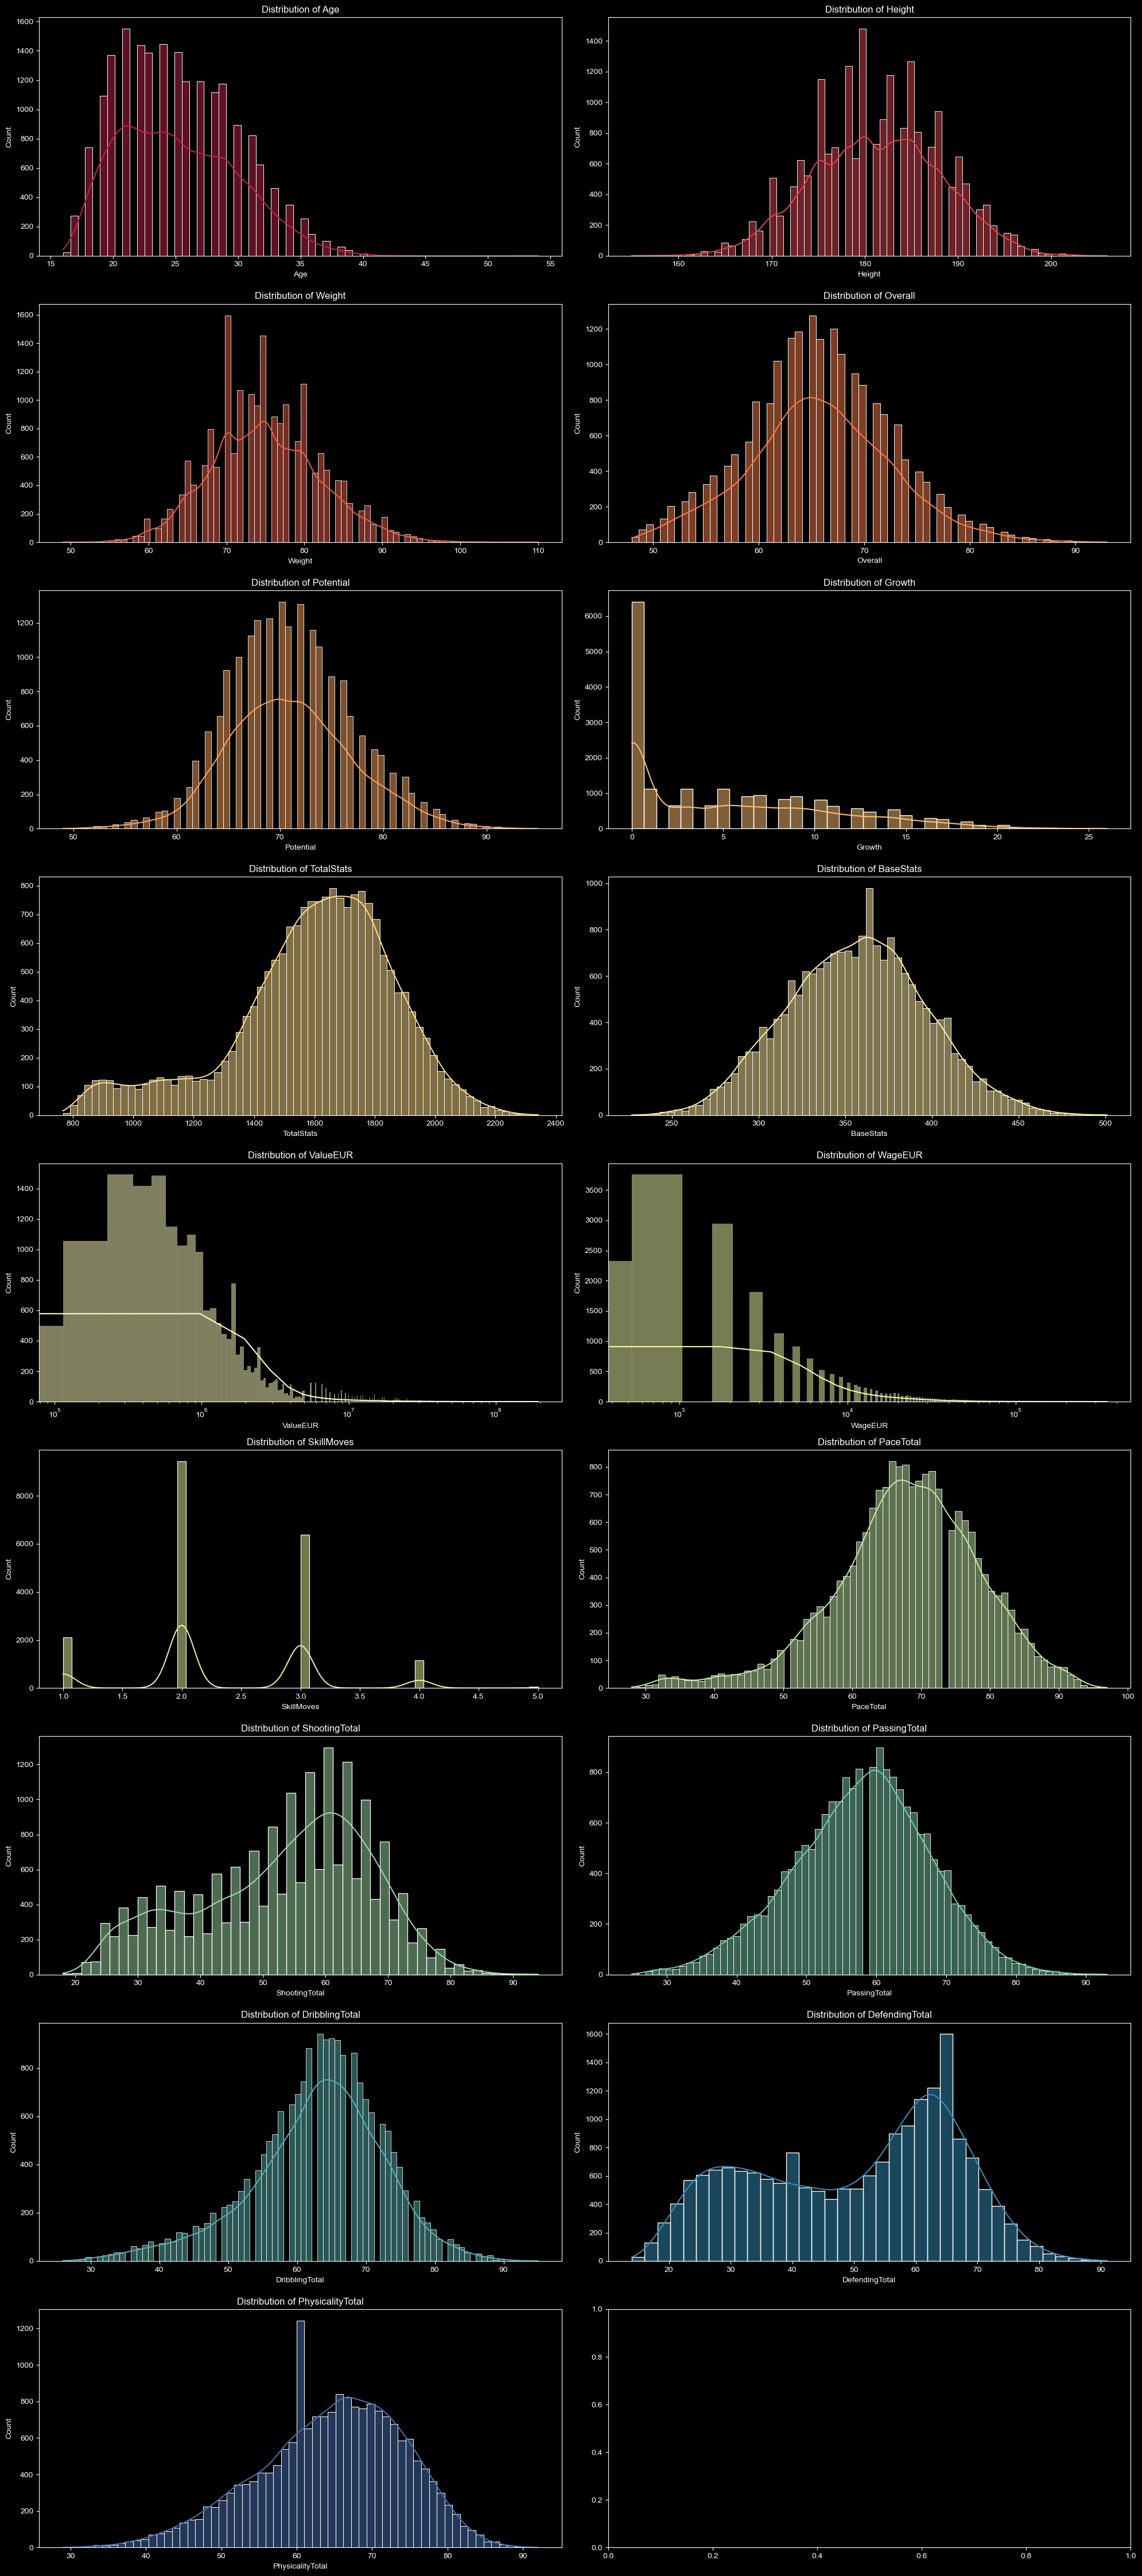

In [221]:
colors = sns.color_palette("Spectral", n_colors=len(df_main.columns))

cols_per_row = 2
num_rows = len(df_main.columns) // cols_per_row + (len(df_main.columns) % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 5))

for i, col in enumerate(df_main.columns):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    
    if col in ['ValueEUR', 'WageEUR']:
        sns.histplot(df_main[col], kde=True, ax=axes[row, col_idx], color=colors[i])
        axes[row, col_idx].set_xscale('log')
    else:
        sns.histplot(df_main[col], kde=True, ax=axes[row, col_idx], color=colors[i])
    
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### 

## **Question1**: Which players have the highest growth potential and could represent high-value acquisitions for clubs looking to invest in future talent?

In [222]:
top_growers = df_main.sort_values(by='Growth', ascending=False).head(10)

print("Top 10 Players with Highest Growth Potential:")
top_growers

Top 10 Players with Highest Growth Potential:


,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,SkillMoves,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
18993,17,191,77,51,77,26,813,286,220000,500,1,58,50,52,49,28,49
16929,17,185,80,58,84,26,919,312,0,0,1,55,57,58,63,21,58
18508,17,181,68,53,78,25,1472,320,275000,500,3,69,42,53,60,44,52
19166,17,165,63,49,74,25,1389,291,150000,500,3,69,45,44,50,36,47
18626,16,178,58,53,78,25,1386,288,300000,550,3,59,50,49,58,32,40
17194,16,180,70,57,82,25,1579,329,500000,1000,2,64,46,56,59,51,53
15915,17,185,69,60,85,25,1583,344,775000,500,3,72,51,57,68,38,58
19254,17,195,95,48,73,25,811,270,130000,500,1,51,45,59,53,20,42
19215,17,188,72,49,73,24,1165,250,140000,500,2,61,21,35,34,49,50
19065,17,192,73,50,74,24,1164,239,140000,500,2,55,25,30,29,53,47


### Take a look at column correlations

#### Let's see what columns correlate with `Growth`
- `Age` lower age is going to be very important
- `Overall`, `PhysicalityTotal` and `BaseStats`

Growth              1.000000
BaseStats          -0.471275
PhysicalityTotal   -0.483617
Overall            -0.529863
Age                -0.864658
Name: Growth, dtype: float64


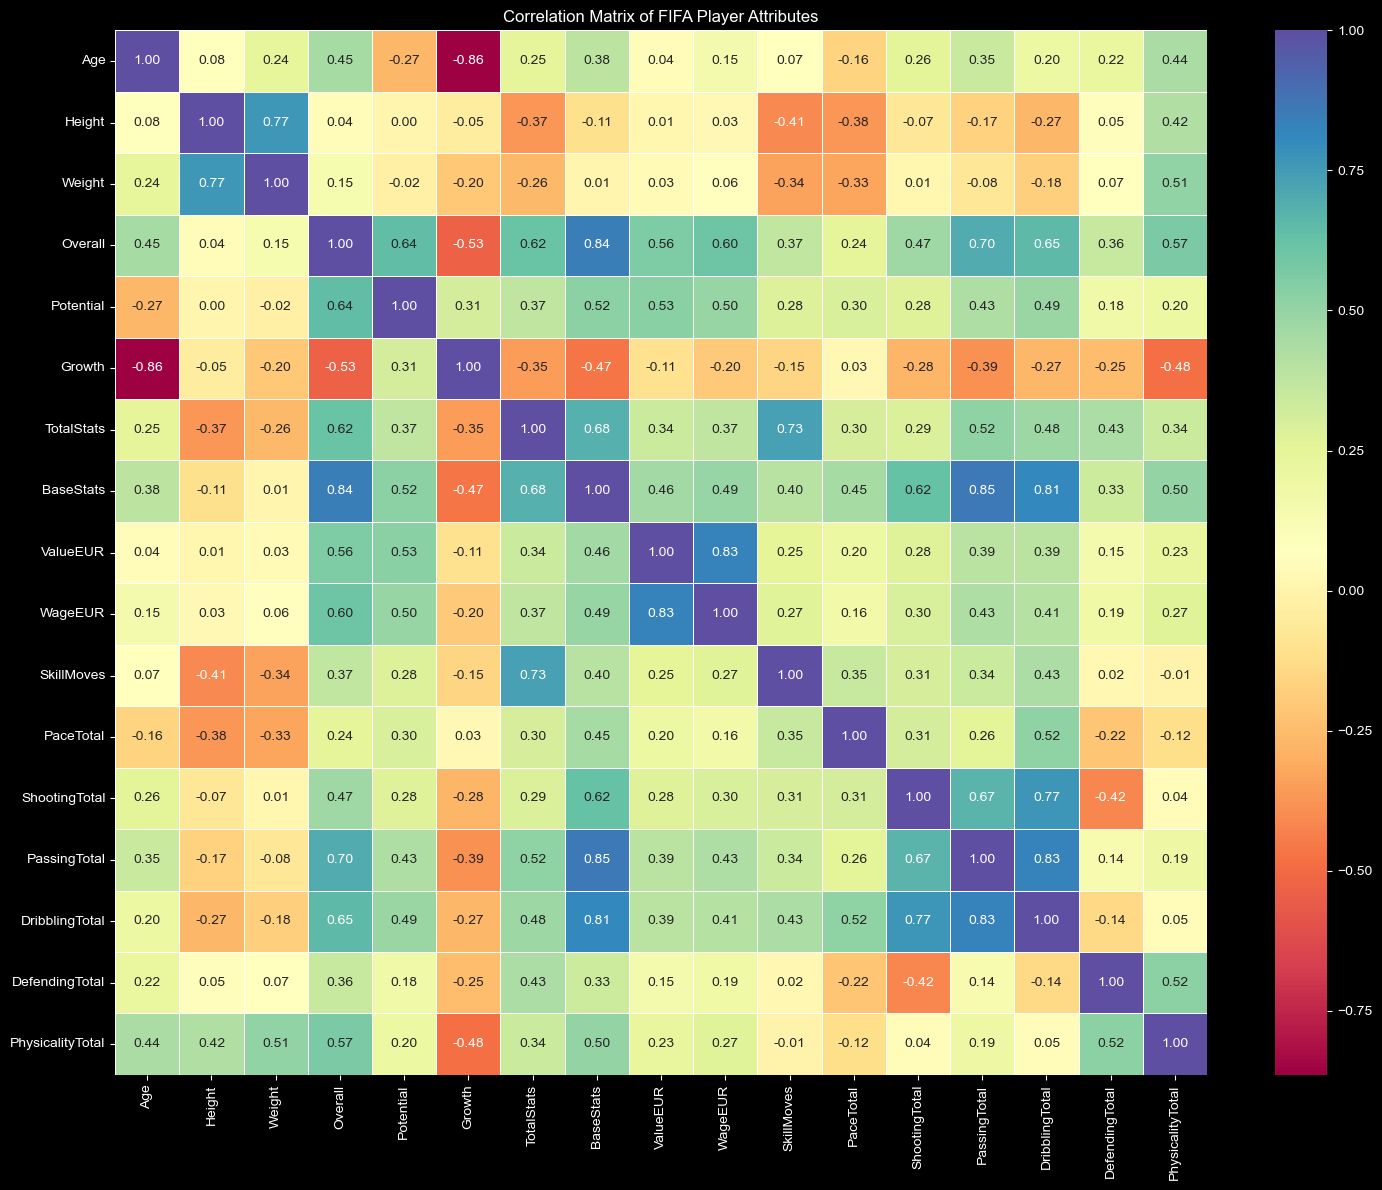

In [223]:
corr_matrix = df_main.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of FIFA Player Attributes')

print(corr_matrix['Growth'][abs(corr_matrix['Growth']) > 0.4].sort_values(ascending=False))

plt.tight_layout()
plt.show()

## **Hypothesis2**: The overall rating of a player is strongly correlated with their market value and wage.
## **Hypothesis2 Conclusion**
#### - True


#### Lets check if `Growth` is the difference between `Potential` and `Overall`
- Conclusion: `Growth` = `Potential` - `Overall`

In [224]:
GrowthCheck = df_main['Growth'] == (df_main['Potential'] - df_main['Overall'])
GrowthCheck.value_counts()

True    19156
Name: count, dtype: int64

#### What age should we target?
- propably age < 23

Text(0.5, 1.0, 'Growth vs Age')

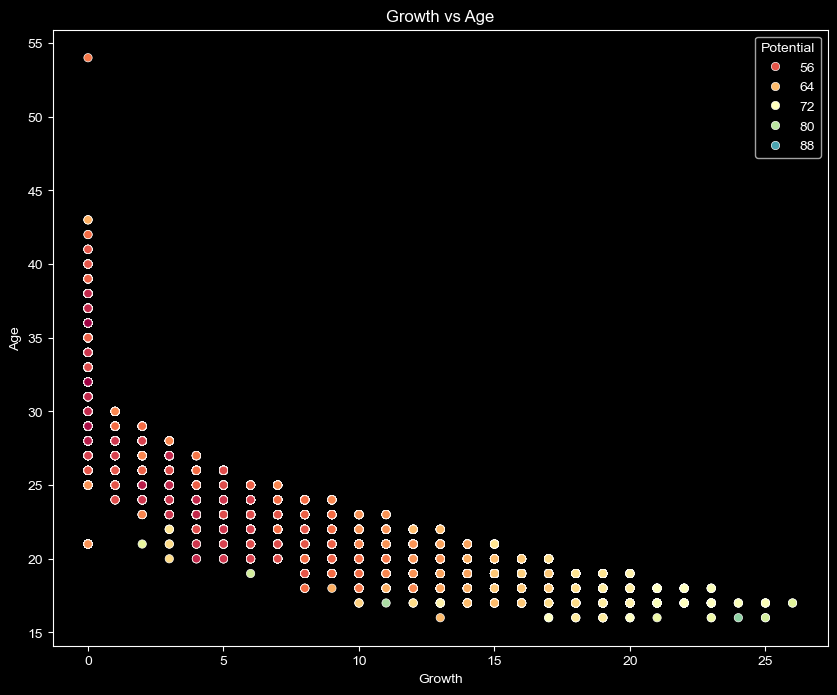

In [225]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Growth', y='Age', data=df_main, hue='Potential', palette='Spectral')
plt.title('Growth vs Age')

#### What `ValueEUR` and `WageEUR` is in the best ratio to `Growth`?
$$ValueToGrowth = \frac{ValueEUR}{Growth}$$

In [226]:
df_main['ValueToGrowth'] = df_main['ValueEUR'].replace(0, 1) / df_main['Growth'].replace(0, 1)
df_main[['Age', 'ValueEUR', 'ValueToGrowth']].describe()

,Age,ValueEUR,ValueToGrowth
count,19156.000000,1.915600e+04,1.915600e+04
mean,25.190750,2.825776e+06,1.557403e+06
std,4.743117,7.609954e+06,5.503527e+06
min,16.000000,0.000000e+00,3.846154e-02
25%,21.000000,4.750000e+05,9.000000e+04
50%,25.000000,9.750000e+05,3.250000e+05
75%,29.000000,2.000000e+06,1.000000e+06
max,54.000000,1.940000e+08,1.295000e+08


Text(0.5, 0, 'Value to Growth Ratio (lower = better)')

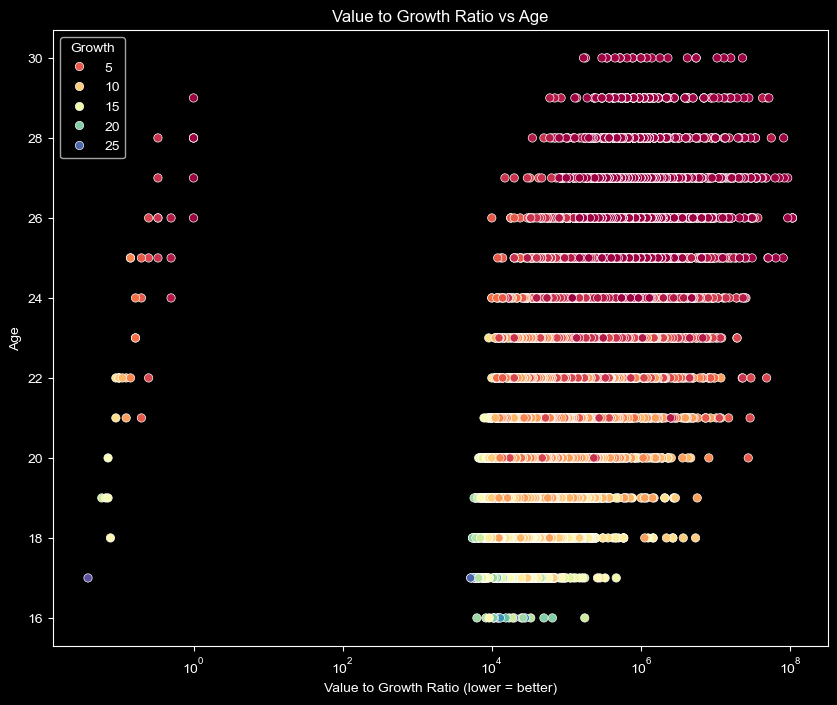

In [227]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ValueToGrowth', y='Age', data=df_main[df_main['Growth'] > 0], hue='Growth', palette='Spectral')
plt.title('Value to Growth Ratio vs Age')
plt.xscale('log')
plt.xlabel('Value to Growth Ratio (lower = better)')

## **Question1 Conclusion**
#### - Teenagers are the best investment since they are cheap and can significantly improve.
---

## **Question2**: What are the key attributes that differentiate high-value players from lower-value players?

In [230]:
attributes = ['Overall', 'Potential', 'SkillMoves', 'TotalStats', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']

value_high = df_main['ValueEUR'].quantile(0.75)
value_low = df_main['ValueEUR'].quantile(0.25)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_main[attributes]), columns=attributes)

df_norm['ValueEUR'] = df_main['ValueEUR']

high_value_norm = df_norm[df_norm['ValueEUR'] >= value_high]
low_value_norm = df_norm[df_norm['ValueEUR'] <= value_low]

high_value_means_norm = high_value_norm[attributes].mean()
low_value_means_norm = low_value_norm[attributes].mean()

norm_comparison = pd.DataFrame({
    'Attribute': attributes,
    'High-Value Mean (norm)': high_value_means_norm.values,
    'Low-Value Mean (norm)': low_value_means_norm.values
})

norm_comparison['High - Low'] = norm_comparison['High-Value Mean (norm)'] - norm_comparison['Low-Value Mean (norm)']

norm_comparison = norm_comparison.sort_values(by='High - Low', ascending=False)
norm_comparison

,Attribute,High-Value Mean (norm),Low-Value Mean (norm),High - Low
0,Overall,0.568277,0.235126,0.333150
3,TotalStats,0.649013,0.410781,0.238232
6,PassingTotal,0.599573,0.378348,0.221225
7,DribblingTotal,0.642460,0.441102,0.201358
9,PhysicalityTotal,0.656982,0.464710,0.192271
5,ShootingTotal,0.569026,0.379560,0.189466
1,Potential,0.587577,0.406005,0.181572
8,DefendingTotal,0.552047,0.382240,0.169807
2,SkillMoves,0.426432,0.262385,0.164047
4,PaceTotal,0.621842,0.540555,0.081287


## **Question2 Conclusion**
#### - `Overall`, `TotalStats` and `PassingTotal` are the three most differentiating attributes
---

## **Hypothesis1**: Players with higher potential ratings are typically younger and command a higher market value.

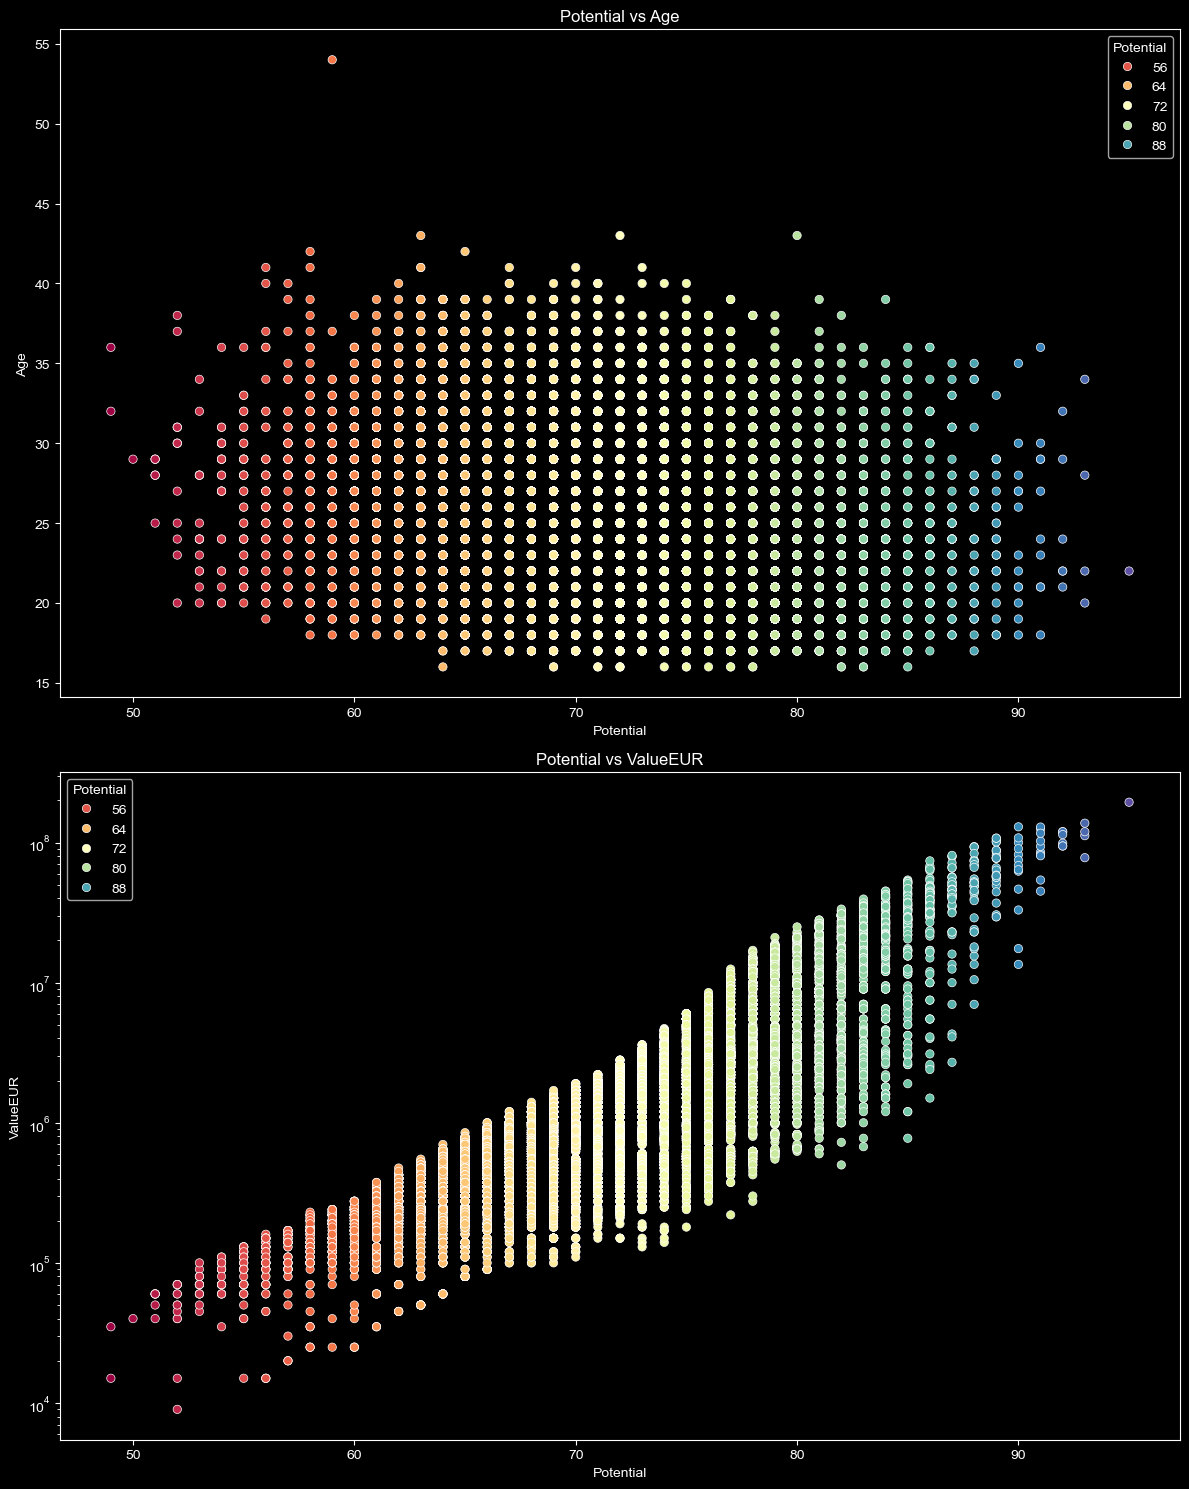

In [234]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15), sharex=False)
plt.subplots_adjust(hspace=0.2)

sns.scatterplot(ax=axes[0], x='Potential', y='Age', data=df_main, hue='Potential', palette='Spectral')
axes[0].set_title('Potential vs Age')
#axes[0].set_xlabel('Potential')

sns.scatterplot(ax=axes[1], x='Potential', y='ValueEUR', data=df_main, hue='Potential', palette='Spectral')
axes[1].set_yscale('log')
axes[1].set_title('Potential vs ValueEUR')

plt.tight_layout()
plt.show()

## **Hypothesis1 Conclusion**
#### - Players with higher potential ratings have age 35 and below and have a higher market value.